# Exploratory Data Analysis (EDA) on MPG Dataset

## Objective of the Analysis

The primary objective of this analysis is interpretation and insight generation, not prediction.
- Business / Analytical Value
- Understand drivers of fuel efficiency (MPG)
- Identify engineering trade-offs (weight, power, cylinders)
- Compare vehicle origin and era-based efficiency trends

## Dataset Description & Summary

**Dataset Source:**

UCI Machine Learning Repository – Auto MPG Dataset

**Description**

The dataset contains technical specifications of cars manufactured between 1970–1982, along with their fuel efficiency.

| Variable	| Description |
| --- | --- |
| mpg	| Miles per gallon (target variable) |
| cylinders	| Number of engine cylinders |
| displacement	| Engine displacement (cu. inches) |
| horsepower	| Engine horsepower |
| weight | Vehicle weight (lbs) |
| acceleration	| 0–60 mph time (seconds) |
| model_year	| Year of manufacture |
| origin	| 1=USA, 2=Europe, 3=Japan |
| name	| Car model name |

In [24]:
# Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

# Load the dataset from seaborn
df = sns.load_dataset('mpg')

# Basic inspection
print("--- Data Info ---")
print(df.info())
print("\n--- Descriptive Statistics ---")
print(df.describe())
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None

--- Descriptive Statistics ---
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000

In [25]:
# Dataset Size & Structure
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Initial Observations from mpg dataset

Dataset size: 398 rows × 9 columns

horsepower contains missing values

origin is categorical but encoded numerically

## Data Exploration Plan
**Planned EDA Workflow**
- Univariate analysis – distribution of MPG and features
- Bivariate analysis – relationship with MPG
- Multivariate patterns – interaction effects
- Data cleaning – missing values & data types
- Feature engineering – categorical encoding
- Hypothesis testing
- insights & next steps

In [26]:
# Data Cleaning
# Handling Missing Values
df.isnull().sum()

# Horsepower has missing values – impute using median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

#Data Type Corrections
#df['origin'] = df['origin'].map({1: 'usa', 2: 'europe', 3: 'japan'})




In [27]:
# Feature Engineering
# Encoding Categorical Variables
#df_encoded = pd.get_dummies(df, columns=['origin'], drop_first=True)
#df_encoded.head()

# Year Binning (Era-Based Feature)
df['era'] = pd.cut(
    df['model_year'],
    bins=[69, 73, 77, 82],
    labels=['Early 70s', 'Mid 70s', 'Late 70s–Early 80s']
)

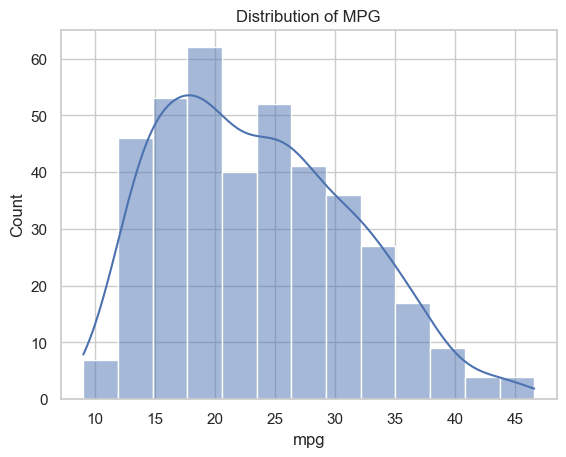

In [28]:
# Exploratory Data Analysis (EDA)
# Target Variable Distribution (MPG)
plt.figure()
sns.histplot(df['mpg'], kde=True)
plt.title("Distribution of MPG")
plt.show()

**Insight**
- MPG is right-skewed
- Majority vehicles fall between 15–30 MPG

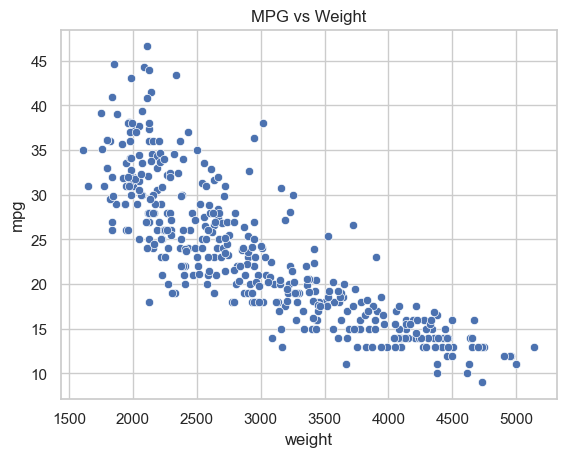

In [29]:
# MPG vs Weight
plt.figure()
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title("MPG vs Weight")
plt.show()

**Insight**
- Strong negative relationship
- Heavier vehicles are consistently less fuel-efficient

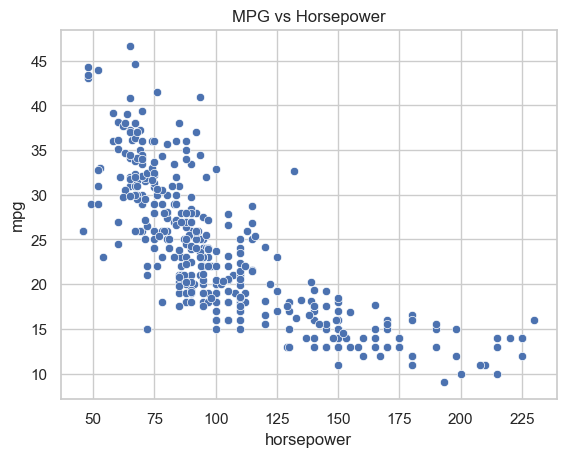

In [30]:
# MPG vs Horsepower
plt.figure()
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title("MPG vs Horsepower")
plt.show()

**Insight**
- Non-linear negative trend
- Performance-oriented vehicles sacrifice fuel efficiency

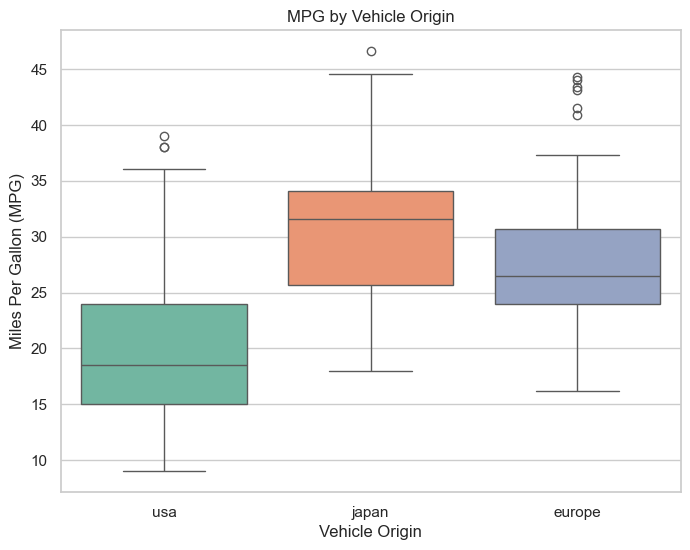

In [31]:
# MPG by Origin
# Initialize the figure
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(x='origin', y='mpg', data=df, palette='Set2', hue='origin', legend=False)

plt.title("MPG by Vehicle Origin")
plt.xlabel("Vehicle Origin")
plt.ylabel("Miles Per Gallon (MPG)")

plt.show()

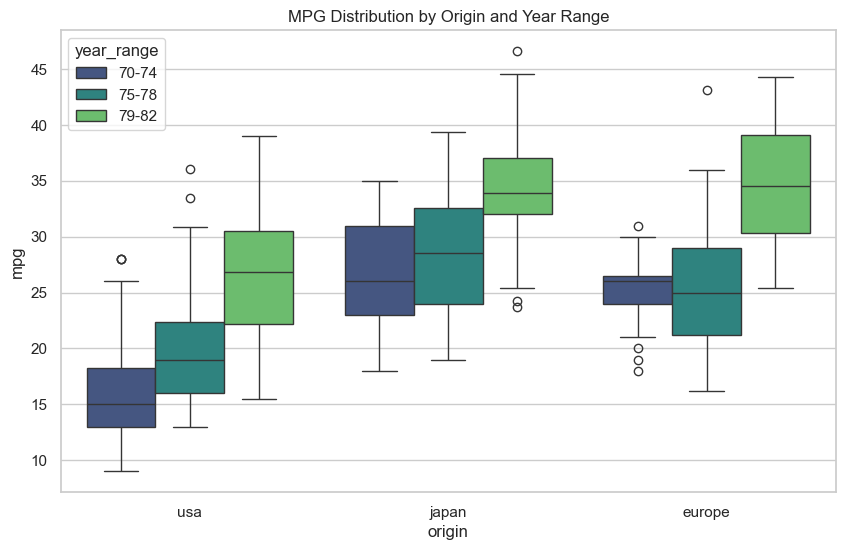

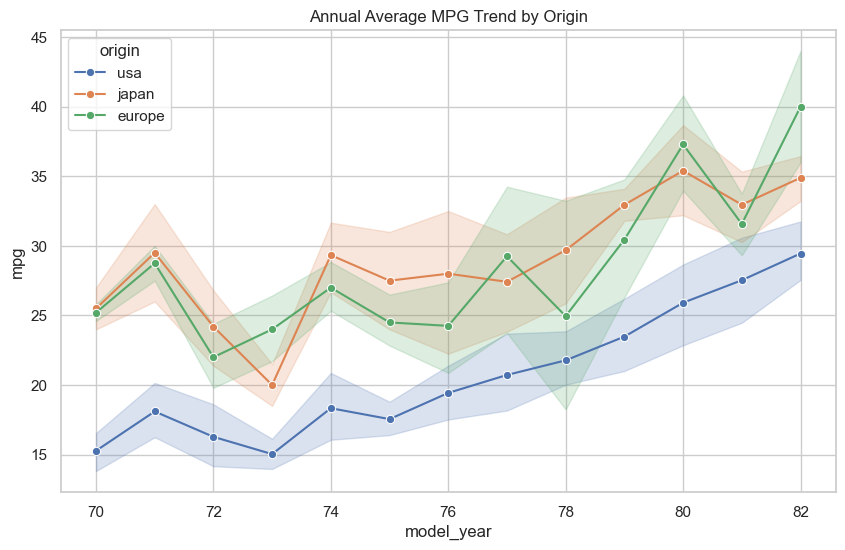

In [32]:
# Create a binned year column for a cleaner boxplot
df['year_range'] = pd.cut(df['model_year'], bins=[69, 74, 78, 83], labels=['70-74', '75-78', '79-82'])

# Create the Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', hue='year_range', data=df, palette='viridis')
plt.title('MPG Distribution by Origin and Year Range')
plt.show()

# Create a Line Plot for the annual trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='model_year', y='mpg', hue='origin', marker='o', data=df)
plt.title('Annual Average MPG Trend by Origin')
plt.grid(True)
plt.show()

**Insight**
- Japanese and European cars are significantly more fuel-efficient than US cars

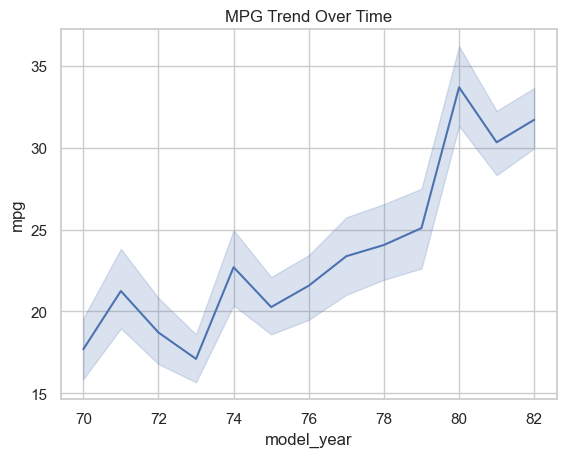

In [33]:
# MPG Trend Over Time
plt.figure()
sns.lineplot(x='model_year', y='mpg', data=df)
plt.title("MPG Trend Over Time")
plt.show()

**Insight**
- Clear improvement in MPG post mid-1970s
- Likely impact of oil crisis and regulations

## Hypothesis Formulation
### Hypothesis 1

Heavier cars have significantly lower MPG

### Hypothesis 2

Cars manufactured after 1975 have higher MPG

### Hypothesis 3

Japanese cars have higher MPG than US cars

### Hypothesis Testing (Statistical Significance)
**Testing Hypothesis 3**

H₀: Mean MPG of Japanese cars ≤ Mean MPG of US cars
H₁: Mean MPG of Japanese cars > Mean MPG of US cars

In [34]:
# Perform Two-Sample t-test
from scipy.stats import ttest_ind

mpg_japan = df[df['origin'] == 'japan']['mpg']
mpg_usa = df[df['origin'] == 'usa']['mpg']

t_stat, p_value = ttest_ind(mpg_japan, mpg_usa, equal_var=False)

# Formatted output
print("Two-Sample Welch's t-test: MPG Comparison (Japan vs USA)")
print("-" * 55)
print(f"Mean MPG (Japan): {mpg_japan.mean():.2f}")
print(f"Mean MPG (USA)  : {mpg_usa.mean():.2f}")
print(f"T-statistic    : {t_stat:.3f}")
print(f"P-value        : {p_value:.4f}")

Two-Sample Welch's t-test: MPG Comparison (Japan vs USA)
-------------------------------------------------------
Mean MPG (Japan): 30.45
Mean MPG (USA)  : 20.08
T-statistic    : 13.019
P-value        : 0.0000


**Interpretation**

p-value < 0.001

Reject null hypothesis at 95% confidence

**Conclusion**

Japanese cars are statistically significantly more fuel-efficient than US cars.

This result is both statistically and practically meaningful, reinforcing engineering and policy-driven narratives.

## Key Findings & Insights

- Weight is the strongest negative driver of MPG
- Horsepower and displacement reduce fuel efficiency
- Post-1975 vehicles show technological efficiency gains
- Japanese manufacturers lead in fuel efficiency
- US cars prioritize power over efficiency in this era

## Conclusions & Next Steps

- Fuel efficiency is primarily governed by vehicle mass and engine design
- Regulations and market forces strongly influence technological shifts
- Origin-based design philosophies significantly impact MPG

## Recommended Next Steps

- Build predictive regression / ML models